<h1><center>Popular Product Combinations within Customer Categories</center></h1>

<h2>Part1. Data Preparation</h2>

<h3>1.1 Import Libraries</h3><br>
<b>Data Analysis</b>
<ul>
    <li>numpy</li>
    <li>pandas</li>
    <li>matplotlib</li>
    <li>seaborn</li>
</ul>
<b>K-Means</b>
<ul>
    <li>KMeans</li>
    <li>StandardScaler</li>
</ul>
<b>Association Rules</b>
<ul>
    <li>apriori</li>
    <li>association_rules</li>
</ul>

In [97]:
#Data Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

#K-Means
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#Association Rules
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

#set seaborn theme
sns.set(style='ticks',palette='pastel',font_scale=1.3)

<h3>1.2 Load & Check Data</h3><br>

<h4>Load Data</h4>

In [2]:
df_raw= pd.read_csv('coffee_transaction.csv',index_col=0)
df_raw.head()

,Datetime,Category,Item,Qty,Price.Point.Name,Gross.Sales,Discounts,Net.Sales,Tax,Notes,Event.Type,Customer.ID,new_item
1,0016-12-31 18:39:33,Coffee,Drip LG,1,LG,3.50,0.0,3.50,0.0,NaN,Payment,NaN,Drip
2,0016-12-31 18:10:03,Coffee,Macchiato,1,Regular,3.75,0.0,3.75,0.0,NaN,Payment,65214137fe0b71f560a1cc91e8cca574cf70e174,Macchiato
3,0016-12-31 18:07:54,Coffee,Americano,2,Regular,6.50,0.0,6.50,0.0,NaN,Payment,81080ed0b8db109c8df8ad1fef45cbaf41fb0f68,Americano
4,0016-12-31 17:24:41,Coffee,Americano,2,Regular,6.50,0.0,6.50,0.0,NaN,Payment,543be87f65b1450017a49db65dee7271c831444f,Americano
5,0016-12-31 17:24:24,Non-Caffeinated Drinks,Hot Chocolate,1,Regular,4.00,0.0,4.00,0.0,NaN,Payment,NaN,Hot Chocolate


Since the note says that the column new_item replaces Item, set the Item column equal to the new_item column and drop new_item.

In [3]:
df = df_raw.copy()
df.Item = df.new_item
df = df.drop('new_item',axis=1)

In [4]:
df.head()

,Datetime,Category,Item,Qty,Price.Point.Name,Gross.Sales,Discounts,Net.Sales,Tax,Notes,Event.Type,Customer.ID
1,0016-12-31 18:39:33,Coffee,Drip,1,LG,3.50,0.0,3.50,0.0,NaN,Payment,NaN
2,0016-12-31 18:10:03,Coffee,Macchiato,1,Regular,3.75,0.0,3.75,0.0,NaN,Payment,65214137fe0b71f560a1cc91e8cca574cf70e174
3,0016-12-31 18:07:54,Coffee,Americano,2,Regular,6.50,0.0,6.50,0.0,NaN,Payment,81080ed0b8db109c8df8ad1fef45cbaf41fb0f68
4,0016-12-31 17:24:41,Coffee,Americano,2,Regular,6.50,0.0,6.50,0.0,NaN,Payment,543be87f65b1450017a49db65dee7271c831444f
5,0016-12-31 17:24:24,Non-Caffeinated Drinks,Hot Chocolate,1,Regular,4.00,0.0,4.00,0.0,NaN,Payment,NaN


<h4>Check Basic Dataset Information</h4>

In [5]:
n_col = df.shape[0]
df.shape

(221470, 12)

<h4>Check Data Type</h4>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221470 entries, 1 to 221470
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Datetime          221470 non-null  object 
 1   Category          221470 non-null  object 
 2   Item              221470 non-null  object 
 3   Qty               221470 non-null  int64  
 4   Price.Point.Name  221386 non-null  object 
 5   Gross.Sales       221470 non-null  float64
 6   Discounts         221470 non-null  float64
 7   Net.Sales         221470 non-null  float64
 8   Tax               221470 non-null  float64
 9   Notes             0 non-null       float64
 10  Event.Type        221470 non-null  object 
 11  Customer.ID       143483 non-null  object 
dtypes: float64(5), int64(1), object(6)
memory usage: 22.0+ MB


All columns have the correct datatype.

Since the Notes column is all null, it can be dropped.

In [7]:
df = df.drop('Notes',axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221470 entries, 1 to 221470
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Datetime          221470 non-null  object 
 1   Category          221470 non-null  object 
 2   Item              221470 non-null  object 
 3   Qty               221470 non-null  int64  
 4   Price.Point.Name  221386 non-null  object 
 5   Gross.Sales       221470 non-null  float64
 6   Discounts         221470 non-null  float64
 7   Net.Sales         221470 non-null  float64
 8   Tax               221470 non-null  float64
 9   Event.Type        221470 non-null  object 
 10  Customer.ID       143483 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 20.3+ MB


In [9]:
df.describe()

,Qty,Gross.Sales,Discounts,Net.Sales,Tax
count,221470.000000,221470.000000,221470.000000,221470.000000,221470.000000
mean,1.076620,3.244814,0.005819,3.238995,0.100599
std,0.320891,2.235726,0.150381,2.228027,0.164800
min,1.000000,0.250000,0.000000,0.230000,0.000000
25%,1.000000,2.500000,0.000000,2.500000,0.000000
50%,1.000000,3.250000,0.000000,3.250000,0.000000
75%,1.000000,4.000000,0.000000,4.000000,0.240000
max,30.000000,100.000000,10.500000,100.000000,6.640000


<h3>1.3 Data Quality Check</h3><br>
Check for:
<ol>
    <li>Percent of missing values</li>
    <li>Percent of unique values</li>
    <li>Data types</li>
    <li>Numeric distribution skewness</li>
</ol>

In [10]:
for col in df.columns:
    null_p = df[col].isnull().sum()/n_col*100
    print('The column ',col,' is ',round(null_p,1),'% null.',sep='')
print('-'*50)
print(df.isnull().sum())

The column Datetime is 0.0% null.
The column Category is 0.0% null.
The column Item is 0.0% null.
The column Qty is 0.0% null.
The column Price.Point.Name is 0.0% null.
The column Gross.Sales is 0.0% null.
The column Discounts is 0.0% null.
The column Net.Sales is 0.0% null.
The column Tax is 0.0% null.
The column Event.Type is 0.0% null.
The column Customer.ID is 35.2% null.
--------------------------------------------------
Datetime                0
Category                0
Item                    0
Qty                     0
Price.Point.Name       84
Gross.Sales             0
Discounts               0
Net.Sales               0
Tax                     0
Event.Type              0
Customer.ID         77987
dtype: int64


The Price.Point.Name column has a few null values, while the Customer.ID column has 35.2% null values.<br>
The Customer.ID column is mostly null probably because some customer are not registered.

<h4>Check Number of Unique Values</h4>

In [11]:
n_col = df.shape[0]
for col in ['Datetime','Category','Item','Price.Point.Name','Event.Type','Customer.ID']:
    unique_n = df[col].nunique()
    unique_p = unique_n/n_col*100
    print('The column ',col,' has ',unique_n,' unique values and is ',round(unique_p,1),'% unique.',sep='')

The column Datetime has 133005 unique values and is 60.1% unique.
The column Category has 9 unique values and is 0.0% unique.
The column Item has 55 unique values and is 0.0% unique.
The column Price.Point.Name has 5 unique values and is 0.0% unique.
The column Event.Type has 1 unique values and is 0.0% unique.
The column Customer.ID has 31822 unique values and is 14.4% unique.


<h4>Check Data Skewness</h4>

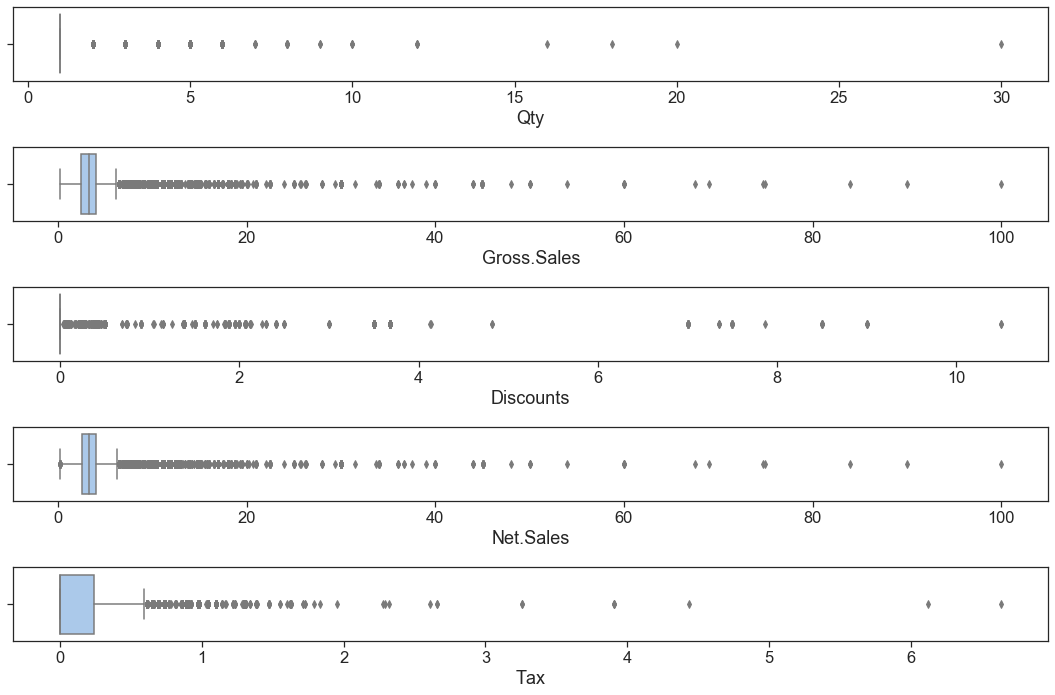

In [12]:
fig, axs = plt.subplots(nrows=5,figsize=(15,10))
for i, col in enumerate(['Qty','Gross.Sales','Discounts','Net.Sales','Tax']):
    f = sns.boxplot(x=df[col],orient='h',ax=axs[i])
#     ax.set_title(col)
fig.tight_layout()

Most values have very skewed distributions. This is reasonable since most purchases consist of only one or two items and have small gross and net sales values, so their distributions leans to the left. Moreover, most items do not have discounts, so the distribution of the discounts column shifts to the left.

<h2>Part2. Preparation for K-Means Cluster Analysis</h2>

<h3>2.1 Select Columns</h3><br>
Only the numeric columns can be passed into the K-Means algorithm.<br>
The following columns are selected from the original 
<ul>
    <li>Convert the Datetime column to:
        <ul>
            <li>Hour</li>
            <li>Minute</li>
        </ul>
       so that customers can be separated based on their purchase time.
       The year and date of purchase do not affect the customers' purchased products as much as purchase time does.
    </li>
    <li>Qty</li>
    <li>Gross.Sales</li>
    <li>Discounts</li>
    <li>Tax</li>
</ul>

In [13]:
cols = ['Datetime','Qty','Gross.Sales','Net.Sales','Discounts']

<h3>2.2 Convert Datetime Columns</h3><br>

In [59]:
df_select = df.copy()
df_select['Datetime'] = pd.to_datetime(df.Datetime.str[2:],format='%y-%m-%d %H:%M:%S')
df_select['Hour'] = df_select['Datetime'].dt.hour

In [18]:
cat_list = list(df.Category.unique())
cat_num = list(range(len(cat_list)))
cat_dict = {}
for cat, num in zip(cat_list,cat_num):
    cat_dict[cat]=num
def map_item_category(category):
    return cat_dict[category]

In [60]:
df_select['Category'] = df.Category.apply(map_item_category)
df_select

,Datetime,Category,Item,Qty,Price.Point.Name,Gross.Sales,Discounts,Net.Sales,Tax,Event.Type,Customer.ID,Hour
1,2016-12-31 18:39:33,0,Drip,1,LG,3.50,0.0,3.50,0.00,Payment,NaN,18
2,2016-12-31 18:10:03,0,Macchiato,1,Regular,3.75,0.0,3.75,0.00,Payment,65214137fe0b71f560a1cc91e8cca574cf70e174,18
3,2016-12-31 18:07:54,0,Americano,2,Regular,6.50,0.0,6.50,0.00,Payment,81080ed0b8db109c8df8ad1fef45cbaf41fb0f68,18
4,2016-12-31 17:24:41,0,Americano,2,Regular,6.50,0.0,6.50,0.00,Payment,543be87f65b1450017a49db65dee7271c831444f,17
5,2016-12-31 17:24:24,1,Hot Chocolate,1,Regular,4.00,0.0,4.00,0.00,Payment,NaN,17
...,...,...,...,...,...,...,...,...,...,...,...,...
221466,2018-01-02 07:40:25,0,Drip,1,SM,2.76,0.0,2.76,0.24,Payment,NaN,7
221467,2018-01-02 07:36:23,4,Tea,2,SM,4.60,0.0,4.60,0.41,Payment,NaN,7
221468,2018-01-02 07:11:38,0,Latte,1,LG,5.05,0.0,5.05,0.45,Payment,NaN,7
221469,2018-01-02 07:11:38,3,Almond,1,Regular Price,0.46,0.0,0.46,0.04,Payment,NaN,7


In [36]:
item_list = list(df.Item.unique())
item_num = list(range(len(item_list)))
item_dict = {}
for item, num in zip(item_list,item_num):
    item_dict[item]=num
def map_item(item):
    return item_dict[item]

In [40]:
df_select['Item'] = df.Item.apply(map_item)
df_select

,Datetime,Category,Item,Qty,Price.Point.Name,Gross.Sales,Discounts,Net.Sales,Tax,Event.Type,Customer.ID,Hour
1,2016-12-31 18:39:33,0,0,1,LG,3.50,0.0,3.50,0.00,Payment,NaN,18
2,2016-12-31 18:10:03,0,1,1,Regular,3.75,0.0,3.75,0.00,Payment,65214137fe0b71f560a1cc91e8cca574cf70e174,18
3,2016-12-31 18:07:54,0,2,2,Regular,6.50,0.0,6.50,0.00,Payment,81080ed0b8db109c8df8ad1fef45cbaf41fb0f68,18
4,2016-12-31 17:24:41,0,2,2,Regular,6.50,0.0,6.50,0.00,Payment,543be87f65b1450017a49db65dee7271c831444f,17
5,2016-12-31 17:24:24,1,3,1,Regular,4.00,0.0,4.00,0.00,Payment,NaN,17
...,...,...,...,...,...,...,...,...,...,...,...,...
221466,2018-01-02 07:40:25,0,0,1,SM,2.76,0.0,2.76,0.24,Payment,NaN,7
221467,2018-01-02 07:36:23,4,8,2,SM,4.60,0.0,4.60,0.41,Payment,NaN,7
221468,2018-01-02 07:11:38,0,9,1,LG,5.05,0.0,5.05,0.45,Payment,NaN,7
221469,2018-01-02 07:11:38,3,7,1,Regular Price,0.46,0.0,0.46,0.04,Payment,NaN,7


In [22]:
df['Price.Point.Name'].unique()

array(['LG', 'Regular', 'Regular Price', 'SM', 'Plain / Choc', nan],
      dtype=object)

<h4>Drop the original Datetime column</h4>

In [61]:
cols = ['Qty','Category','Gross.Sales','Net.Sales','Discounts','Hour']
df_select = df_select[cols]

<h3>2.3 Check Correlation of the Columns</h3><br>

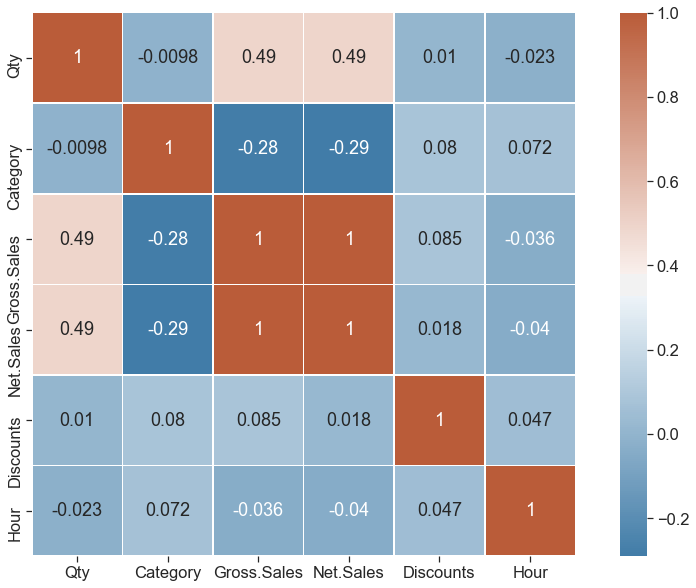

In [62]:
cmap = sns.diverging_palette(600, 24, as_cmap=True)
plt.figure(figsize=(16,10))
sns.heatmap(df_select.corr(), cmap=cmap, square=True, linewidths=0.5, annot=True)

The Gross.Sales and Net.Sales are highly correlated. Remove the Net.Sales column.

In [63]:
cols = ['Qty','Category','Gross.Sales','Discounts','Hour']

In [64]:
df_km = df_select[cols]

<h3>2.4 K-Means Cluster Analysis</h3><br>

<h4>Minimize Cluster Inertia</h4>

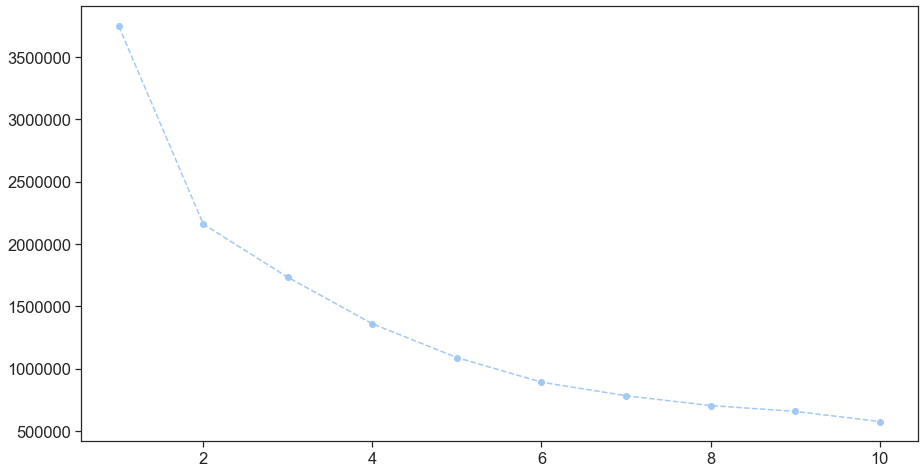

In [65]:
cluster_range = range(1,11)
kmeans_inertia = []
for i in cluster_range:
    kmeans = KMeans(n_clusters=i,random_state=50)
    kmeans.fit(df_km)
    kmeans_inertia.append(kmeans.inertia_)
plt.figure(figsize=(15,8))
plt.plot(cluster_range, kmeans_inertia, marker='o', linestyle='--')

2 clusters seems to be the optimal choice.

In [135]:
kmeans_2 = KMeans(n_clusters=2,random_state=50)
kmeans_2.fit(df_km)

KMeans(n_clusters=2, random_state=50)

<h4>Apply the Predicted Labels from K-Means</h4>

In [136]:
df_2 = df.copy()
df_km_2 = df_km.copy()
df_2['Segment'] = kmeans_2.predict(df_km)
df_km_2['Segment'] = kmeans_2.predict(df_km)

<h4>Calculate the Mean of Each Column for Each Segment</h4>

In [137]:
kmeans_mean = df_km_2.pivot_table(index='Segment',values=cols,aggfunc='mean').round(2).T
kmeans_count = df_km_2.pivot_table(index='Segment',values='Gross.Sales',aggfunc='count').round(2).T.rename({'Gross.Sales':'count'})
df_kmeans = kmeans_mean.append(kmeans_count).round(2)
df_kmeans
df_kmeans.style\
    .highlight_max(axis=1,color='#cce1ff')\
    .highlight_min(axis=1,color='#ffd4b5')\
    .set_precision(2)

Segment,0,1
Category,1.37,1.00
Discounts,0.01,0.00
Gross.Sales,3.03,3.40
Hour,14.81,9.41
Qty,1.07,1.08
count,92054.00,129416.00


The two customer segments have similar average discounts, gross sales, and quantity.<br>
The average hours of the two customer segments differ, indicating that customers in the two segments shop at different time periods.<br>
Customers in segment 1 has a smaller average hour and a larger number, showing that more customers shop in the morning. This is reasonable since most people shop for coffee in the morning.

<h4>Inspect the Property of Each Segment</h4>

In [75]:
def get_distribution(data, column):
    distribution = pd.DataFrame(data[column].value_counts(normalize=True)\
                   .sort_values(ascending=False)).reset_index()
    return distribution

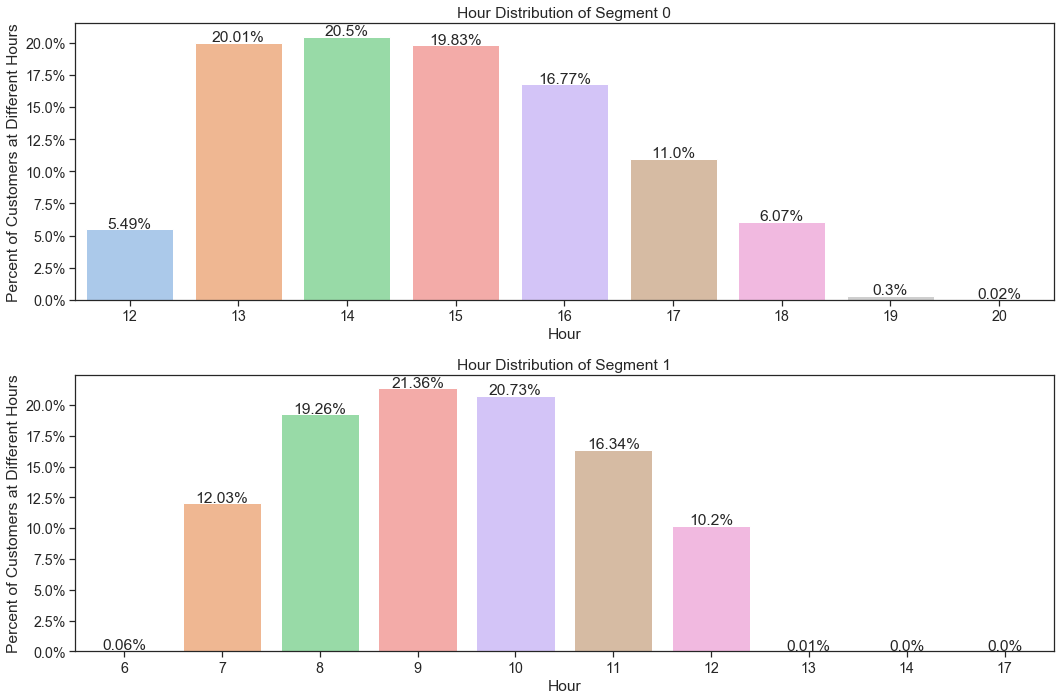

In [139]:
fig, axs = plt.subplots(nrows=2, figsize=(15,10))

col = 'Hour'

for i in range(2):
    f = sns.barplot(x='index',y=col,
                    data=get_distribution(df_km_2.loc[df_km_2.Segment==i],col),
                    ax=axs[i]
                   )
    f.set(xlabel=col,ylabel='Percent of Customers at Different Hours', title='Hour Distribution of Segment '+str(i))
    axs[i].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
    for p in f.patches:
        h = p.get_height()
        f.text(p.get_x() + p.get_width()/2., h+0.001, str(round(h*100,2))+'%' ,ha='center')

fig.tight_layout()

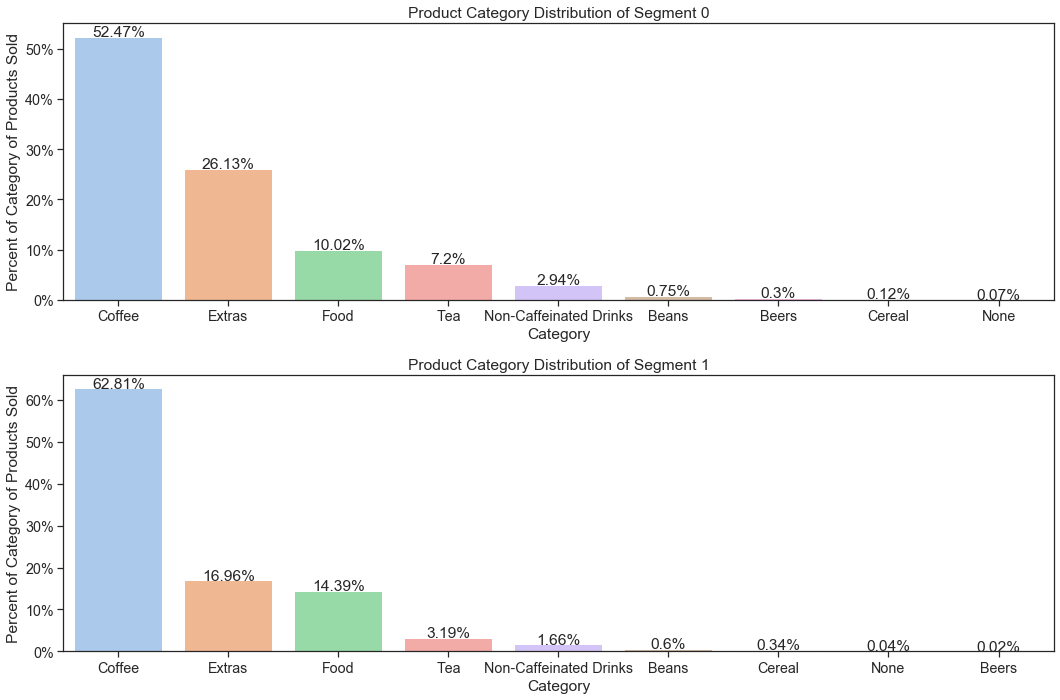

In [140]:
fig, axs = plt.subplots(nrows=2, figsize=(15,10))

col = 'Category'

for i in range(2):
    f = sns.barplot(x='index',y=col,
                    data=get_distribution(df_2.loc[df_2.Segment==i],col),
                    ax=axs[i]
                   )
    f.set(xlabel=col,ylabel='Percent of Category of Products Sold',
          title='Product Category Distribution of Segment '+str(i))
    axs[i].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
    for p in f.patches:
        h = p.get_height()
        f.text(p.get_x() + p.get_width()/2., h+0.001, str(round(h*100,2))+'%' ,ha='center')

fig.tight_layout()

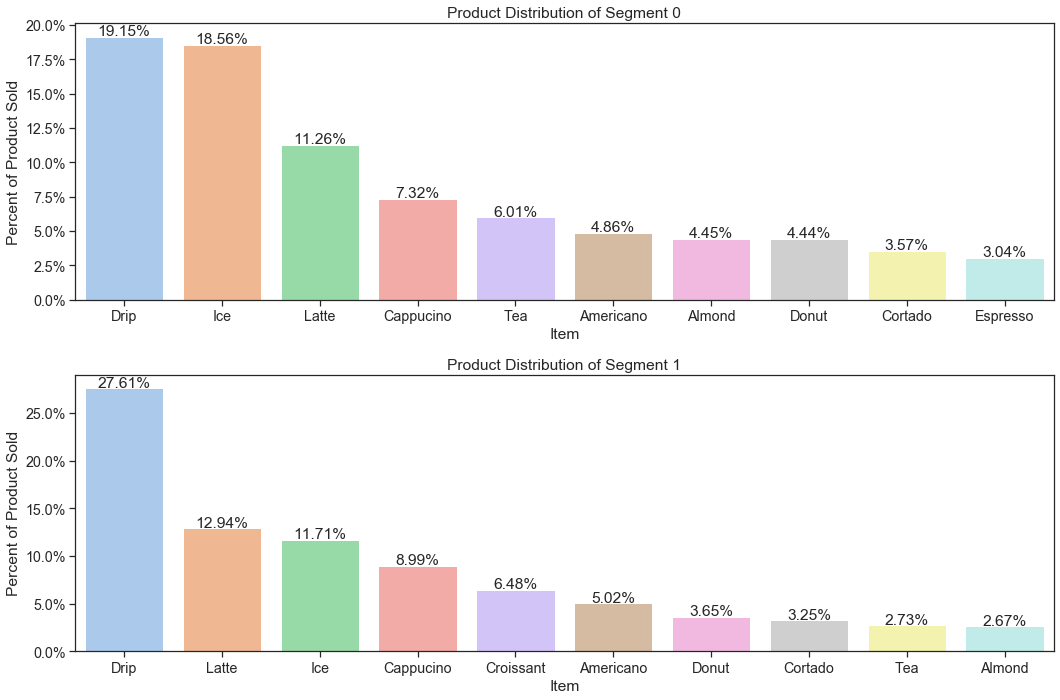

In [141]:
fig, axs = plt.subplots(nrows=2, figsize=(15,10))

col = 'Item'

for i in range(2):
    f = sns.barplot(x='index',y=col,
                    data=get_distribution(df_2.loc[df_2.Segment==i],col).head(10),
                    ax=axs[i]
                   )
    f.set(xlabel=col,ylabel='Percent of Product Sold', title='Product Distribution of Segment '+str(i))
    axs[i].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
    for p in f.patches:
        h = p.get_height()
        f.text(p.get_x() + p.get_width()/2., h+0.001, str(round(h*100,2))+'%' ,ha='center')

fig.tight_layout()

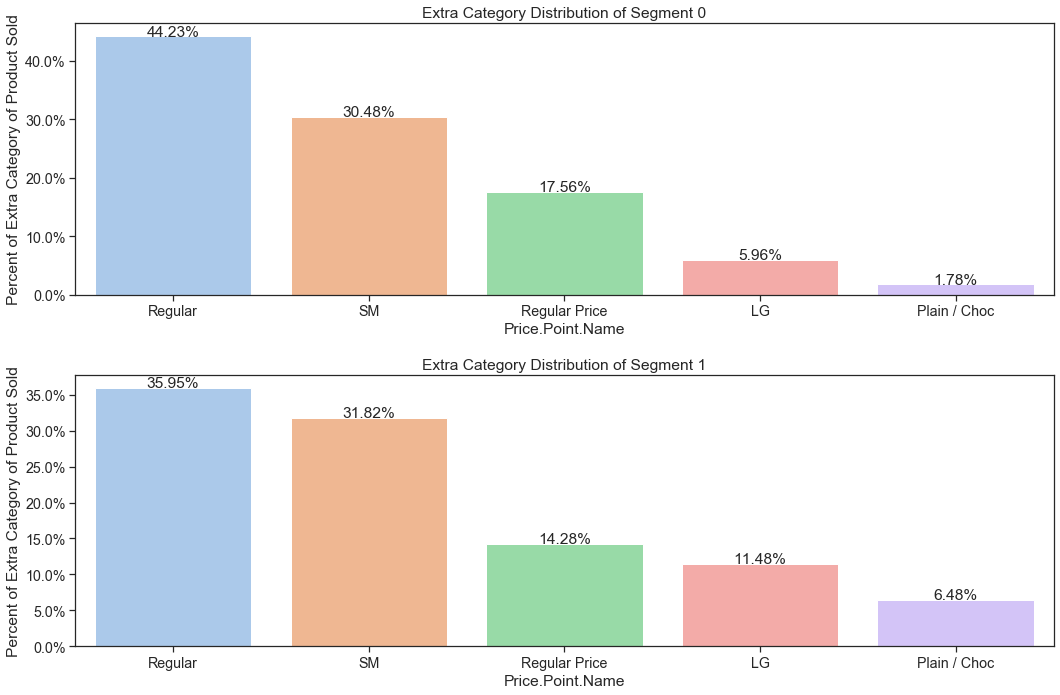

In [212]:
fig, axs = plt.subplots(nrows=2, figsize=(15,10))

col = 'Price.Point.Name'

for i in range(2):
    f = sns.barplot(x='index',y=col,
                    data=get_distribution(df_2.loc[df_2.Segment==i],col).head(10),
                    ax=axs[i]
                   )
    f.set(xlabel=col,ylabel='Percent of Extra Category of Product Sold', title='Extra Category Distribution of Segment '+str(i))
    axs[i].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
    for p in f.patches:
        h = p.get_height()
        f.text(p.get_x() + p.get_width()/2., h+0.001, str(round(h*100,2))+'%' ,ha='center')

fig.tight_layout()

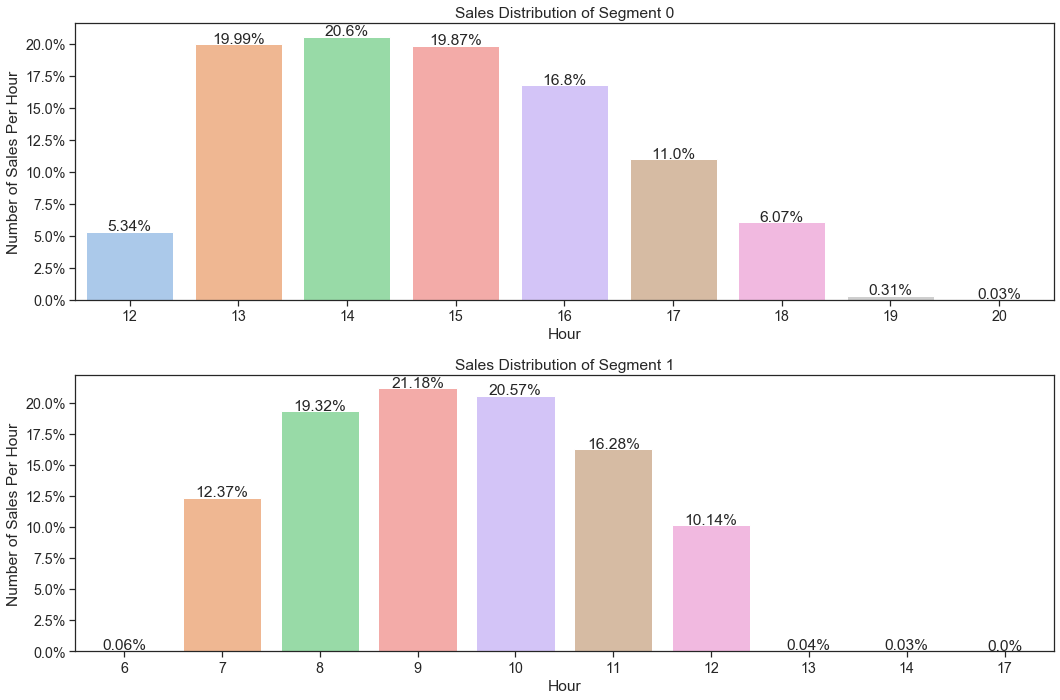

In [142]:
fig, axs = plt.subplots(nrows=2, figsize=(15,10))

for i in range(2):
    d = df_km_2.loc[df_km_2.Segment==i]\
                         .pivot_table(index='Hour',values='Qty',aggfunc='sum')\
                         .reset_index()
    d.Qty = d.Qty / d.Qty.sum()
    f = sns.barplot(x='Hour',y='Qty',
                    data=d,
                    ax=axs[i]
                   )
    f.set(xlabel='Hour',ylabel='Number of Sales Per Hour', title='Sales Distribution of Segment '+str(i))
    axs[i].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
    for p in f.patches:
        h = p.get_height()
        f.text(p.get_x() + p.get_width()/2., h+0.001, str(round(h*100,2))+'%' ,ha='center')

fig.tight_layout()

<ul>
    <li>Customers in segment 0 mostly shop in the afternoon.</li>
    <li>Most customers buy only 1 product.</li>
</ul>
Comparing to customers in the other segment, customers who shop in the afternoon buy tea more often.

<ul>
    <li>Customers in segment 1 mostly shop in the morning.</li>
    <li>Most customers buy only 1 product.</li>
</ul>
Comparing to customers in the other segment, customers who shop in the morning buy croissants more often.

Drip, ice, latte, and cappuccino are the most popular coffees regardless of customer shopping hour.

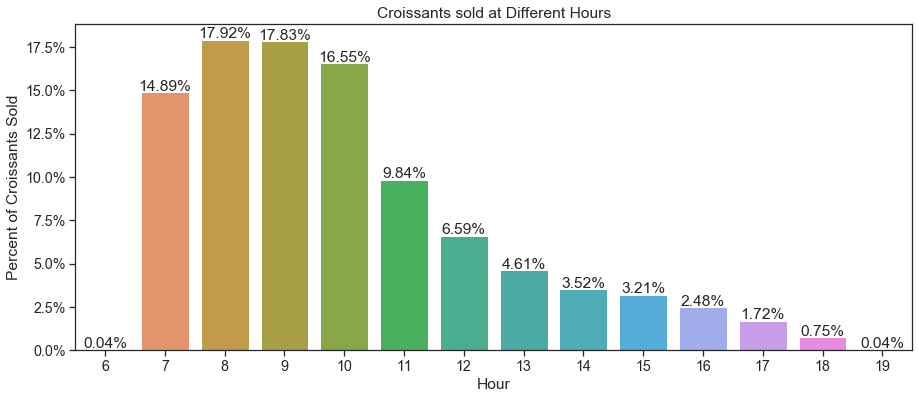

In [152]:
croissant_ct = pd.DataFrame(df_km_2.loc[df_2.Item=='Croissant'].Hour.value_counts(normalize=True)\
                            .sort_values(ascending=False)).reset_index()

sns.set(style='ticks',palette='pastel',font_scale=1.3)

fig,axs = plt.subplots(figsize=(15,6))

fig = sns.barplot(x='index',y='Hour',data=croissant_ct,ax=axs)
fig.set(xlabel='Hour', ylabel='Percent of Croissants Sold', title='Croissants sold at Different Hours')
axs.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
for f in fig.patches:
    h = f.get_height()
    fig.text(f.get_x() + f.get_width()/2., h+0.001, str(round(h*100,2))+'%' ,ha="center")

Graphing the number of crossaints sold at different hours show that most croissants are sold in the morning.

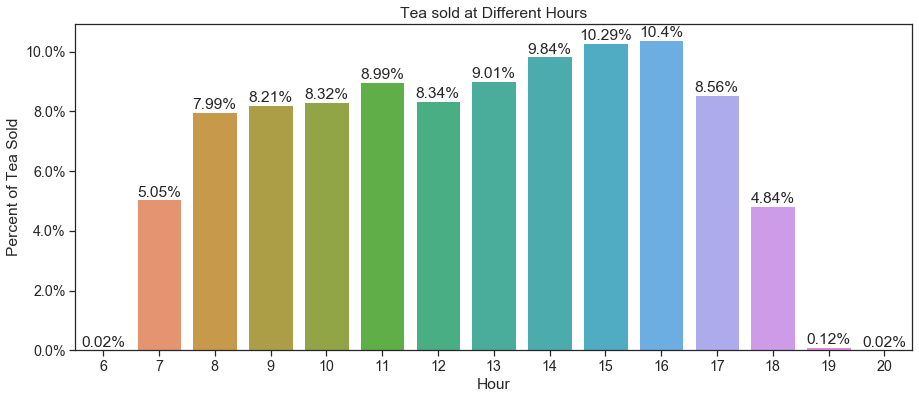

In [36]:
tea_ct = pd.DataFrame(df_km_2.loc[df_2.Item=='Tea'].Hour.value_counts(normalize=True)\
                      .sort_values(ascending=False)).reset_index()

sns.set(style='ticks',palette='pastel',font_scale=1.3)

fig,axs = plt.subplots(figsize=(15,6))

fig = sns.barplot(x='index',y='Hour',data=tea_ct,ax=axs)
fig.set(xlabel='Hour', ylabel='Percent of Tea Sold', title='Tea sold at Different Hours')
axs.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
for f in fig.patches:
    h = f.get_height()
    fig.text(f.get_x() + f.get_width()/2., h+0.001, str(round(h*100,2))+'%' ,ha="center")

Graphing the number of tea sold at different hours show that most croissants are sold in the afternoon, confirming the result of cutomer segmentation.

<h2>Part3. Apriori Association Rules Analysis</h2>

<h3>3.1 Define Hot Encoding Function for Apriori Analysis</h3><br>

In [144]:
def hot_encode(x):
    if x >= 1:
        return 1
    else:
        return 0

<h3>3.2 Association Rules Analysis</h3><br>

<h4>Afternoon Customers</h4>

In [149]:
df_2_1 = df_2.loc[df_2.Segment==0]
df_2_1_ar = df_2_1.pivot_table(index='Datetime',columns='Item',values='Qty',aggfunc='sum').fillna(value=0.0)
df_2_1_ar = df_2_1_ar.applymap(hot_encode)
freq_items = apriori(df_2_1_ar, min_support=0.005, use_colnames=True)
rules = association_rules(freq_items, metric="lift", min_threshold=1)
rules.loc[rules.confidence>=0.4].sort_values(by='lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
22,"(Almond, Ice)",(Latte),0.015331,0.180400,0.010557,0.688602,3.817084,0.007791,2.631999
4,(Almond),(Latte),0.071681,0.180400,0.036048,0.502890,2.787641,0.023116,1.648730
20,(Soy),(Latte),0.025941,0.180400,0.012718,0.490278,2.717727,0.008039,1.607935
32,"(Drip, Latte)",(Ice),0.012358,0.286543,0.006900,0.558309,1.948430,0.003359,1.615286
29,"(Ice, Donut)",(Drip),0.013853,0.305422,0.007638,0.551365,1.805255,0.003407,1.548203
15,(Ice),(Drip),0.286543,0.305422,0.137741,0.480699,1.573883,0.050224,1.337524
14,(Drip),(Ice),0.305422,0.286543,0.137741,0.450985,1.573883,0.050224,1.299522
12,(Extra Shot),(Drip),0.015493,0.305422,0.006377,0.411628,1.347733,0.001645,1.180507


The associations with confidence larger than 0.5 are selected and ranked by lift.<br>
<ul>
    <li>Almond seems to be a very popular flavor for latte. Maybe this should be one regular coffee flavor.</li>
    <li>Soy seems to be a popular addition to latte. Maybe soy should be a regular coffee flavor.</li>
    <li>Extra shots are often bought for drip coffee. A discount could possibly be made for drip with extra shot.</li>
    <li>Donuts are often bought with ice drip. A discount could possibly be made for drip with donuts.</li>
</ul>

<h4>Morning Customers</h4>

In [147]:
df_2_2 = df_2.loc[df_2.Segment==1]
df_2_2_ar = df_2_2.pivot_table(index='Datetime',columns='Item',values='Qty',aggfunc='sum').fillna(value=0.0)
df_2_2_ar = df_2_2_ar.applymap(hot_encode)
df_2_2_ar_items = apriori(df_2_2_ar, min_support=0.005, use_colnames=True)
rules = association_rules(df_2_2_ar_items, metric="lift", min_threshold=1)
rules.loc[rules.confidence>=0.4].sort_values(by='lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
18,"(Almond, Ice)",(Latte),0.006204,0.200483,0.005256,0.847222,4.225916,0.004012,5.233205
16,(Soy),(Latte),0.012716,0.200483,0.008814,0.693127,3.457293,0.006264,2.605368
2,(Almond),(Latte),0.041827,0.200483,0.027868,0.666274,3.323353,0.019483,2.395732
11,(Ice),(Drip),0.178006,0.425325,0.128300,0.720766,1.694623,0.052590,2.058041
29,"(Ice, Donut)",(Drip),0.008900,0.425325,0.006093,0.684647,1.609703,0.002308,1.822324
25,"(Croissant, Ice)",(Drip),0.013553,0.425325,0.008715,0.643052,1.511906,0.002951,1.609967
8,(Extra Shot),(Drip),0.022169,0.425325,0.012322,0.555802,1.306770,0.002893,1.293736


The associations with confidence larger than 0.5 are selected and ranked by lift.<br>
<ul>
    <li>Almond seems to be a very popular flavor for latte. Maybe this should be one regular coffee flavor.</li>
    <li>Soy seems to be a popular addition to latte. Maybe soy latte should be a regular coffee flavor.</li>
    <li>Extra shots are often bought for drip coffee. A discount could possibly be made for drip with extra shot.</li>
    <li>Donuts, lenka bars, and croissants are often bought with ice drip. A discount could possibly be made for drip with donuts, lenka bars, and croissants, or for drip with food in general in the morning.</li>
</ul>